<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/K_Means2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
%matplotlib inline

In [2]:
df = pd.read_csv('/content/technical_support_data-2.csv')

In [3]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [4]:
df.shape

(23, 8)

In [5]:
df_attr = df.iloc[:,1:]

In [7]:
df_scaled =  df_attr.apply(zscore)

In [8]:
df_scaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


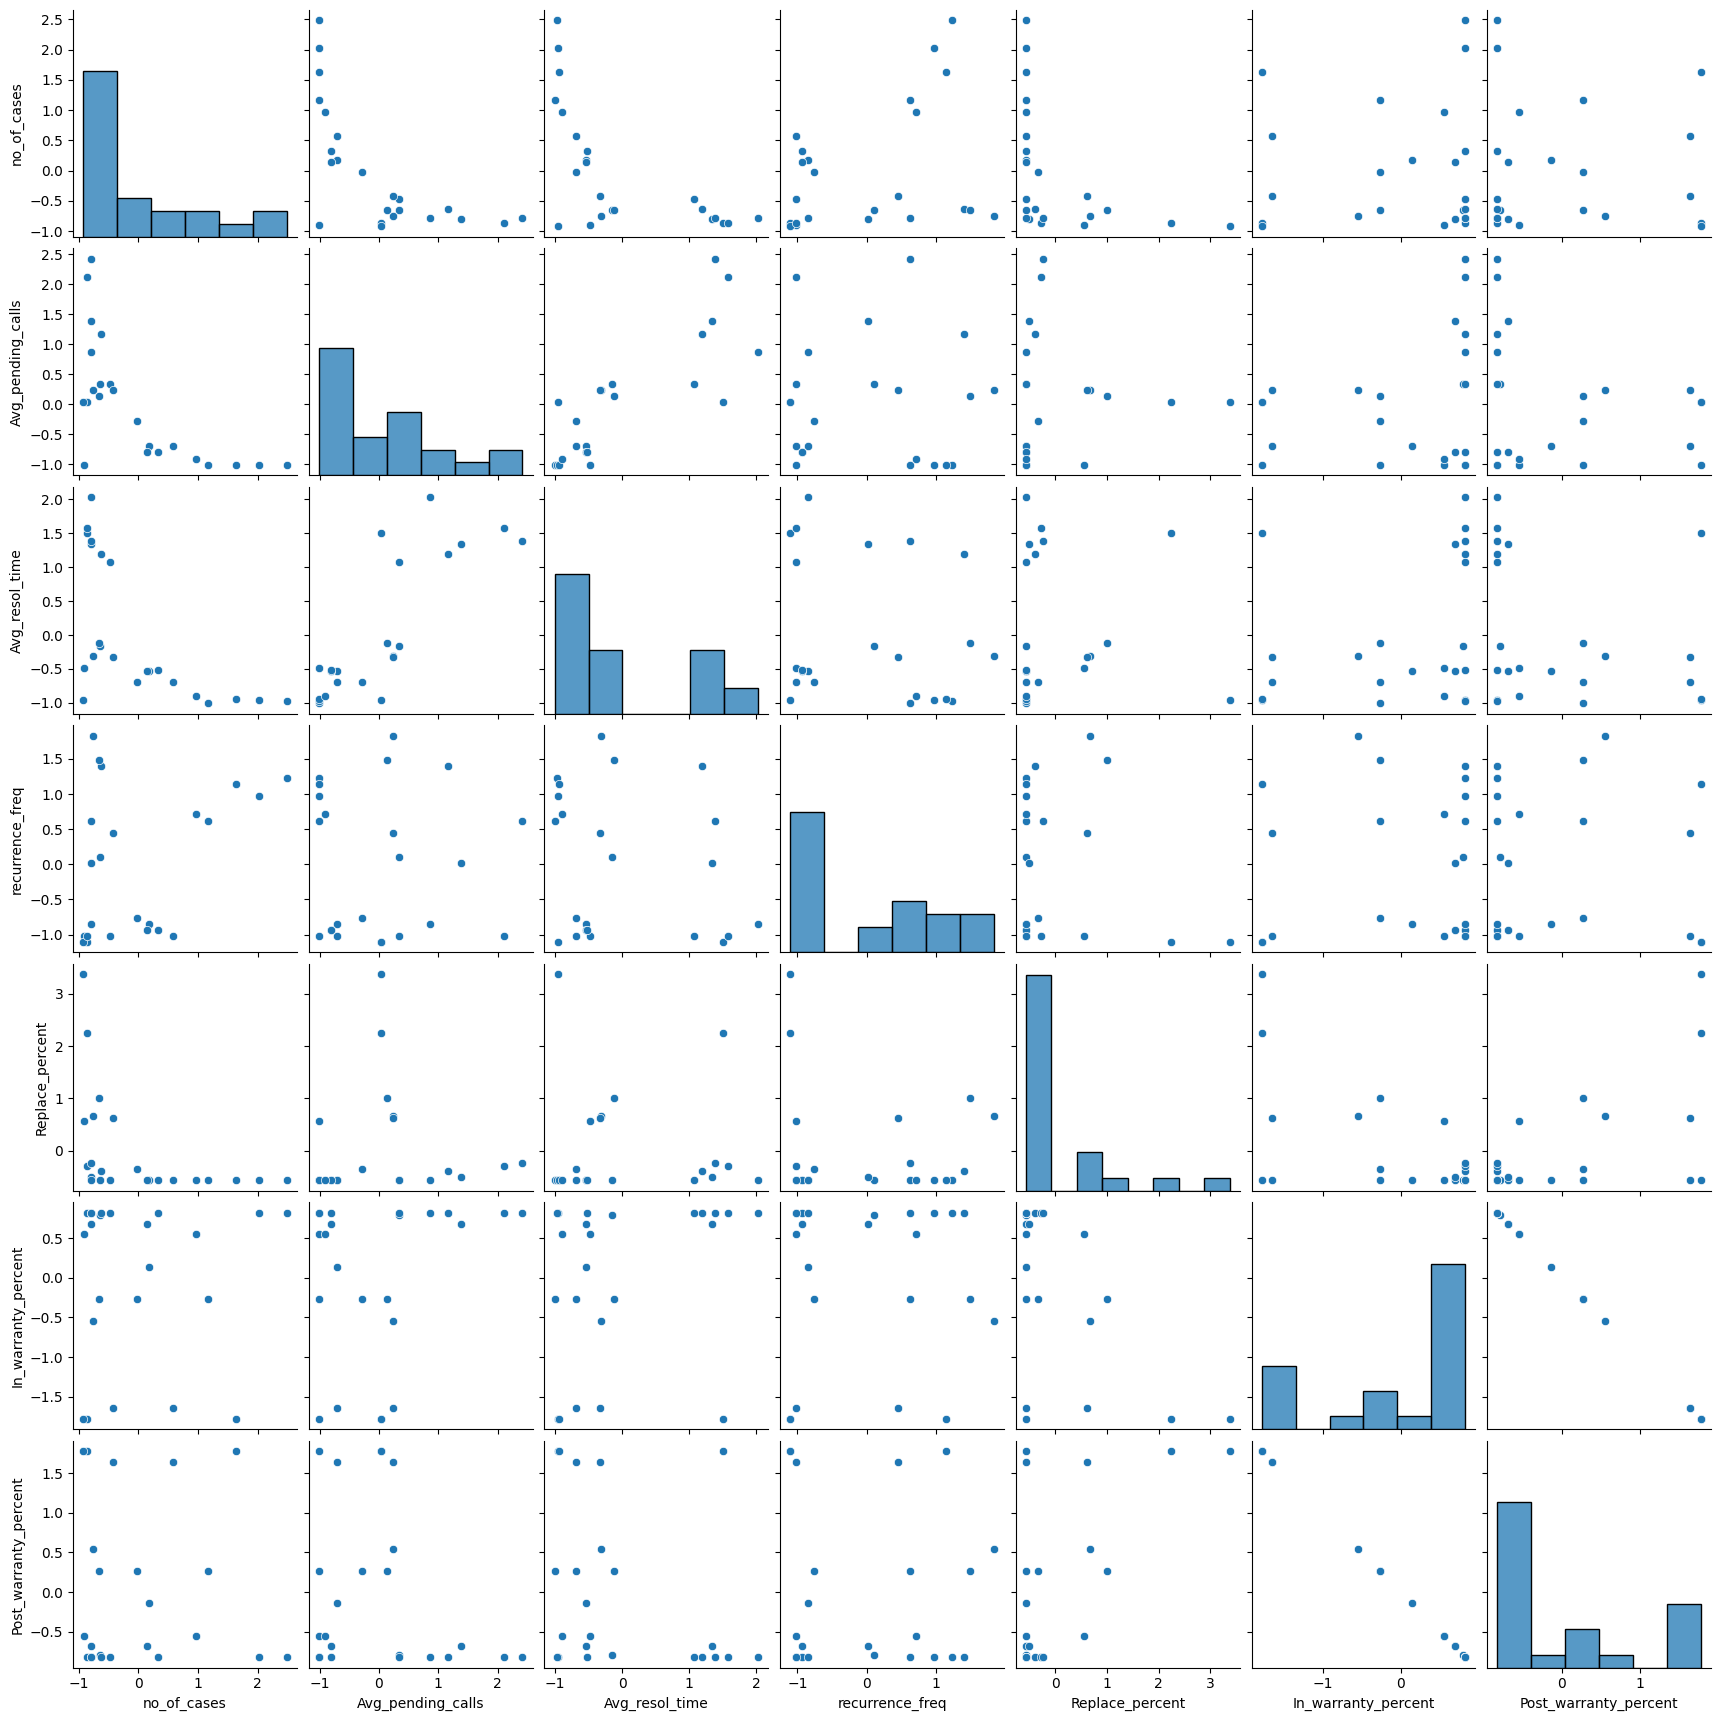

In [11]:
sns.pairplot(df_scaled)

## The Elbow Method

In [28]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meansDistortions = []

for k in clusters:
  model = KMeans(n_clusters = k, n_init = 'auto')

  model.fit(df_scaled)
  prediction = model.predict(df_scaled)

  meansDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis = 1)) / df_scaled.shape[0])

In [29]:
meansDistortions

[2.5132186215720433,
 2.011069807948648,
 1.6617818464032823,
 1.463257762734927,
 1.2199181235440961,
 1.0620842732423292,
 0.9815040637871222,
 0.8602726484933112,
 0.8105492456559643]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

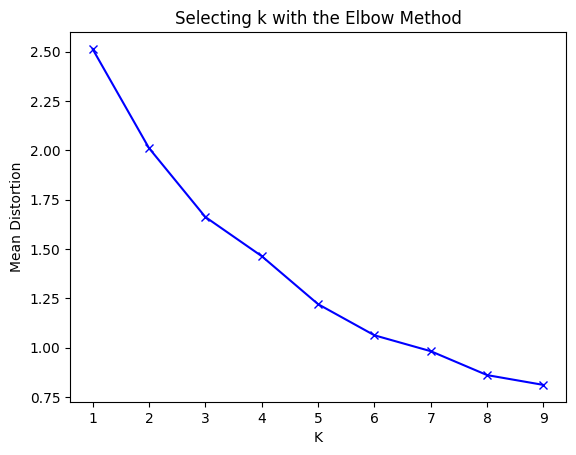

In [30]:
plt.plot(clusters, meansDistortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Mean Distortion')
plt.title('Selecting k with the Elbow Method')

In [22]:
df_scaled.shape[0]

23

Let us first start with K = 3

In [32]:
final_model = KMeans(n_clusters = 3, n_init = 'auto')
final_model.fit(df_scaled)
prediction = final_model.predict(df_scaled)

In [35]:
prediction

array([2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1,
       1], dtype=int32)

In [33]:
df['Clusters'] = prediction
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [36]:
df[df['Clusters']==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0


In [37]:
df[df['Clusters']==1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,1
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,1
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,1
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,1
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,1
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,1
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,1


In [38]:
df[df['Clusters']==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,2
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,2
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,2
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,2
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,2
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,2


### Let us try K = 5

In [39]:
final_model = KMeans(n_clusters = 5, n_init = 'auto')
final_model.fit(df_scaled)
prediction = final_model.predict(df_scaled)

In [40]:
prediction

array([0, 2, 0, 2, 0, 1, 1, 0, 4, 1, 1, 0, 0, 1, 4, 4, 3, 0, 1, 4, 3, 3,
       3], dtype=int32)

In [41]:
df['Clusters'] = prediction
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [42]:
df[df['Clusters']==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,0
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,0
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,0


In [43]:
df[df['Clusters']==1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,1
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,1
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,1
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,1
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,1


In [44]:
df[df['Clusters']==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2


In [45]:
df[df['Clusters']==3]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,3
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,3
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,3
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,3


In [46]:
df[df['Clusters']==4]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Clusters
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,4
14,Remote Keys get stuck,450,1.0,8,0.25,0.0,100,0,4
15,Unable to operate menu from remote,520,1.0,7,0.28,0.0,100,0,4
19,WIFI connectivity breaks,290,1.1,11,0.22,0.0,90,10,4
